In [ ]:
# !pip install tensorflow

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.9.1'

In [3]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
# import tensorflow as tf

hello = tf.constant(" Hello TensorFlow!")
sess = tf.Session()

sess.run(hello)

b' Hello TensorFlow!'

In [5]:
#first_session_only_tensorflow.py

x = tf.constant(100, name='x')
y = tf.Variable(x*2, name='y') #컴퓨터 변수 

model = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(model)
    print("constant x : {x} \nVariable y : {y}".format(
        x = sess.run(x), 
        y = sess.run(y)
    ))

constant x : 100 
Variable y : 200


In [6]:
# 변수 a, b는 동적으로 지정
a = tf.placeholder("int32")
b = tf.placeholder("int32")

# multiply 함수는 입력된 정수 a와 b의 곱셈을 반환한다.
y = tf.multiply(a,b)

sess = tf.Session()

print("tf.multiply({a},{b}) : {y}".format(
    a = 20, b = 30,
    y = sess.run(y , feed_dict={a: 20, b: 30})
))

tf.multiply(20,30) : 600


In [7]:
a = tf.constant(10, name="a")
b = tf.constant(20, name="b")
y = tf.Variable(a**2 + b**2, name="y")

model = tf.global_variables_initializer() # 모델 초기화

with tf.Session() as sess:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./graph/board", sess.graph)
    sess.run(model)
    print(" constant a = {a} \n constant b = {b} \n Variable y = {y}".format(
        a = sess.run(a), 
        b = sess.run(b),
        y = sess.run(y)
    )) 

 constant a = 10 
 constant b = 20 
 Variable y = 500


In [ ]:
http://localhost:9999/#graphs

In [8]:
!tensorboard --logdir=graph/board --port=9999

^C


In [9]:
import numpy as np

tensor_1d = np.array([1.2, 3.4, 5.6, 7.8])
tensor_2d = np.arange(16).reshape((4,4))

In [10]:
tf_tensor = tf.convert_to_tensor(tensor_1d, dtype=tf.float64)

with tf.Session() as sess:
    print(sess.run(tf_tensor))
    print(sess.run(tf_tensor[0]))
    print(sess.run(tf_tensor[-1]))

[1.2 3.4 5.6 7.8]
1.2
7.8


In [11]:
tf_tensor_1d = tf.convert_to_tensor(tensor_1d, dtype=tf.float64)
tf_tensor_2d = tf.convert_to_tensor(tensor_2d, dtype=tf.float64)
sess = tf.Session()

In [12]:
sess.run(tf_tensor_1d)

array([1.2, 3.4, 5.6, 7.8])

In [13]:
sess.run(tf_tensor_1d[0])

1.2

In [14]:
sess.run(tf_tensor_1d[2:])

array([5.6, 7.8])

In [15]:
sess.run(tf_tensor_2d)

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

In [16]:
sess.run(tf_tensor_2d[3][3])

15.0

In [17]:
sess.run(tf_tensor_2d[1:3,1:3])

array([[ 5.,  6.],
       [ 9., 10.]])

참조 : https://tensorflow.org/guide/migrate?hl=ko

In [18]:
import numpy as np
import tensorflow.compat.v1 as tf

In [19]:
# tf.disable_v2_behavior()
tf.compat.v1.disable_v2_behavior()

In [20]:
# Create a constant op
# This op is added as a node to the default graph
hello = tf.constant("Hello, TensorFlow!")

# seart a TF session
sess = tf.Session()

In [21]:
hello

<tf.Tensor 'Const_4:0' shape=() dtype=string>

In [22]:
hello

<tf.Tensor 'Const_4:0' shape=() dtype=string>

In [23]:
result = sess.run(hello)
type(result)

bytes

In [24]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [25]:
type(sess)

tensorflow.python.client.session.Session

In [26]:
# node1 = tf.constant(3.0, tf.float32)
node1 = tf.constant(3.0)
node2 = tf.constant(4.0)            # also tf.float32 implicitly
node3 = tf.add(node1, node2)
# node3 = node1 + node2

In [27]:
print("node1 :", node1)
print("node2 :", node2)
print("node3 :", node3)

node1 : Tensor("Const_5:0", shape=(), dtype=float32)
node2 : Tensor("Const_6:0", shape=(), dtype=float32)
node3 : Tensor("Add_1:0", shape=(), dtype=float32)


In [28]:
sess = tf.Session()
print("sess.run(node1, node2)\t: ", sess.run([node1, node2]))
print("sess.run(adder_node)  \t: ", sess.run(node3))

sess.run(node1, node2)	:  [3.0, 4.0]
sess.run(adder_node)  	:  7.0


In [29]:
type(node3)

tensorflow.python.framework.ops.Tensor

In [30]:
type(sess.run(node3))

numpy.float32

In [31]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

# + provides a shortcut for tf.add(a, b)
adder_node = a + b  

In [32]:
sess.run(adder_node, feed_dict={a: 3, b: 4.5})

7.5

In [33]:
sess.run(adder_node, feed_dict={a: [1,3], b: [2, 4]})

array([3., 7.], dtype=float32)

In [34]:
add_and_triple = adder_node * 3.

In [35]:
sess.run(add_and_triple, feed_dict={a: 3, b:4.5})

22.5

In [37]:
# import tensorflow as tf
# import numpy as np

# 변수 a, b는 동적으로 지정
# a = tf.placeholder("float32")
# b = tf.placeholder("float32")
a = tf.placeholder("int32")
b = tf.placeholder("int32")

# multiply 함수는 입력된 정수 a와 b의 곱셈을 반환한다.
# y = tf.mul(a,b)
y = tf.multiply(a,b)

sess = tf.Session()

print("tf.mul({a},{b}) : {y}".format(
    a = 20, b = 30,
    y = sess.run(y , feed_dict={a: 20, b: 30})
))

tf.mul(20,30) : 600


In [38]:
#first_session_only_tensorflow.py
# import tensorflow as tf
# import numpy as np

x = tf.constant(100, name='x')
y = tf.Variable(x*2, name='y')

# model = tf.global_variables_initializer()
model = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(model)
    print("Check the variable : \n- constant x : {x} \n- Variable y : {y}".format(
        x = sess.run(x), 
        y = sess.run(y)
    ))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Check the variable : 
- constant x : 100 
- Variable y : 200


In [39]:
rank0 = 3
rank0

3

In [40]:
rank1 = [1. ,2., 3.]
rank1

[1.0, 2.0, 3.0]

In [41]:
rank2 = [[1., 2., 3.], 
         [4., 5., 6.]]
rank2

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

In [42]:
rank3 = [
            [
                [1., 2., 3.]
            ], 
            [
                [7., 8., 9.]
            ]
] 
rank3

[[[1.0, 2.0, 3.0]], [[7.0, 8.0, 9.0]]]

In [43]:
tensor_1d = np.array([1.2, 3.4, 5.6, 7.8])
tensor_1d

array([1.2, 3.4, 5.6, 7.8])

In [44]:
tensor_2d = np.arange(16).reshape((4,4))
tensor_2d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [45]:
sess = tf.Session()
tf_tensor_1d = tf.convert_to_tensor(tensor_1d,dtype=tf.float64)
tf_tensor_2d = tf.convert_to_tensor(tensor_2d,dtype=tf.float64)

In [46]:
sess.run(tf_tensor_1d)

array([1.2, 3.4, 5.6, 7.8])

In [47]:
sess.run(tf_tensor_1d[0])

1.2

In [48]:
sess.run(tf_tensor_1d[2:])

array([5.6, 7.8])

In [49]:
sess.run(tf_tensor_2d)

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

In [50]:
#sess.run(tf_tensor_2d[3][3])
sess.run(tf_tensor_2d[3, 3])

15.0

In [51]:
sess.run(tf_tensor_2d[1:3, 1:3])

array([[ 5.,  6.],
       [ 9., 10.]])

In [52]:
import tensorflow as tf
import numpy as np

# 3x3 행렬
matrix1 = np.array([(1, 1, 1), (1, 1, 1), (1, 1, 1)])
matrix2 = np.array([(2, 2, 2), (2, 2, 2), (2, 2, 2)])

# constant, 텐서 자료 구조로 변환
# matrix1 = tf.constant(matrix1)
# matrix2 = tf.constant(matrix2)
matrix1 = tf.constant(matrix1, dtype='int32')
matrix2 = tf.constant(matrix2, dtype='int32')

# 행렬곱과 행렬합 계산
matrix_mul = tf.matmul(matrix1, matrix2)
matrix_sum = tf.add(matrix1, matrix2)

# 행렬의 행렬식(determinant)
matrix3 = np.array([(2, 7, 2), (1, 4, 2), (9, 0, 2)], dtype='float32')
print('\n* matrix3 = \n{}'.format(matrix3))

# matrix_dtm = tf.matrix_determinant(matrix3)
matrix_dtm = tf.linalg.det(matrix3)
print('\n* matrix_dtm = {} '.format(matrix_dtm))

# 세션을 열고 그래프 연산
# with tf.Session() as sess:
#     result1 = sess.run(matrix_mul)
#     result2 = sess.run(matrix_sum)
#     result3 = sess.run(matrix_dtm)
    
#     # tensorboard for graph
#     writer = tf.summary.FileWriter("./graph/sect01", sess.graph)


* matrix3 = 
[[2. 7. 2.]
 [1. 4. 2.]
 [9. 0. 2.]]

* matrix_dtm = Tensor("MatrixDeterminant:0", shape=(), dtype=float32) 


In [53]:
# matrix_dtm = tf.matrix_determinant(matrix3)
matrix_dtm = tf.linalg.det(matrix3)
matrix_dtm

<tf.Tensor 'MatrixDeterminant_1:0' shape=() dtype=float32>

In [54]:
# 세션을 열고 그래프 연산
# sess = tf.compat.v1.Session()
with tf.compat.v1.Session() as sess:
    result1 = sess.run(matrix_mul)
    result2 = sess.run(matrix_sum)
    result3 = sess.run(matrix_dtm)
    
    # tensorboard for graph
    # writer = tf.summary.FileWriter("./graph/sect01", sess.graph)
    writer = tf.compat.v1.summary.FileWriter("./graph/board", sess.graph)

# 연산 결과 출력
print('\n* matrix_mul = \n{}'.format(result1))
print('\n* matrix_sum = \n{}'.format(result2))
print('\n* matrix_dtm = {}'.format(result3))


* matrix_mul = 
[[6 6 6]
 [6 6 6]
 [6 6 6]]

* matrix_sum = 
[[3 3 3]
 [3 3 3]
 [3 3 3]]

* matrix_dtm = 55.99999237060547


In [56]:
from tqdm.notebook import tqdm
import numpy as np
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

In [77]:
tf.random_normal([1])

<tf.Tensor 'random_normal_7:0' shape=(1,) dtype=float32>

In [78]:
# import tensorflow as tf
# from tqdm import tqdm_notebook

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# TF 변수 선언 (1차원 랜던숫자)
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) 
# GradientDescentOptimizer 점점 기울기 줄인다.
# learning_rate는 크면 데이터 처리는 빠르나 정확하지 않을 수 있다.
# learning_rate는 작으면 over피팅이라해서 데이터가 아예 다르게 나올 수 있다.

train = optimizer.minimize(cost)
#cost를 최소화한다.

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())
# 변수를 초기화 시킨다. 

In [58]:
for step in tqdm(range(2001)):
    sess.run(train)
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val},  \t W={W_val},  \t b={b_val}".format(
            step=step, 
            cost_val=sess.run(cost), 
            W_val=sess.run(W), 
            b_val=sess.run(b)
        ));

  0%|          | 0/2001 [00:00<?, ?it/s]

step=0, 	 cost=6.926876068115234,  	 W=[-0.43861476],  	 b=[0.521994]
step=1, 	 cost=5.502824783325195,  	 W=[-0.3252238],  	 b=[0.5690987]
step=2, 	 cost=4.3770575523376465,  	 W=[-0.22430019],  	 b=[0.6107257]
step=3, 	 cost=3.4870665073394775,  	 W=[-0.1344612],  	 b=[0.64748317]
step=4, 	 cost=2.7834455966949463,  	 W=[-0.05447748],  	 b=[0.679912]
step=200, 	 cost=0.05128643289208412,  	 W=[0.7369749],  	 b=[0.59791785]
step=400, 	 cost=0.01958365924656391,  	 W=[0.83746654],  	 b=[0.3694769]
step=600, 	 cost=0.007478006649762392,  	 W=[0.89956415],  	 b=[0.22831427]
step=800, 	 cost=0.0028554731979966164,  	 W=[0.93793666],  	 b=[0.1410844]
step=1000, 	 cost=0.0010903553338721395,  	 W=[0.9616487],  	 b=[0.08718149]
step=1200, 	 cost=0.0004163511039223522,  	 W=[0.9763012],  	 b=[0.05387286]
step=1400, 	 cost=0.0001589841122040525,  	 W=[0.98535556],  	 b=[0.0332902]
step=1600, 	 cost=6.0706577642122284e-05,  	 W=[0.9909507],  	 b=[0.02057123]
step=1800, 	 cost=2.318107544851955e

In [59]:
# import tensorflow as tf

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())

In [60]:
# Fit the line
steps     = []
cost_vals = []
W_vals    = []
b_vals    = []
for step in tqdm(range(2001)):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                         feed_dict={X: [1, 2, 3], 
                                                    Y: [1, 2, 3]})
    steps.append(step)
    cost_vals.append(cost_val)
    W_vals.append(W_val)
    b_vals.append(b_val)
    # W_vals.append(float(W_val))
    # b_vals.append(float(b_val))
    
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val}, \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));

  0%|          | 0/2001 [00:00<?, ?it/s]

step=0, 	 cost=2.0309603214263916, 	 W=[0.23332798], 	 b=[0.42628136]
step=1, 	 cost=1.6174451112747192, 	 W=[0.2878328], 	 b=[0.4484226]
step=2, 	 cost=1.2905253171920776, 	 W=[0.33636484], 	 b=[0.46794084]
step=3, 	 cost=1.0320550203323364, 	 W=[0.3795865], 	 b=[0.48512742]
step=4, 	 cost=0.8276904225349426, 	 W=[0.41808665], 	 b=[0.5002414]
step=200, 	 cost=0.022527461871504784, 	 W=[0.8260972], 	 b=[0.39532217]
step=400, 	 cost=0.008602075278759003, 	 W=[0.8925386], 	 b=[0.24428503]
step=600, 	 cost=0.0032846902031451464, 	 W=[0.9335954], 	 b=[0.15095326]
step=800, 	 cost=0.001254253089427948, 	 W=[0.958966], 	 b=[0.09327989]
step=1000, 	 cost=0.0004789340600837022, 	 W=[0.9746435], 	 b=[0.05764129]
step=1200, 	 cost=0.00018288084538653493, 	 W=[0.9843312], 	 b=[0.03561876]
step=1400, 	 cost=6.983210187172517e-05, 	 W=[0.9903177], 	 b=[0.02201021]
step=1600, 	 cost=2.6665142286219634e-05, 	 W=[0.99401695], 	 b=[0.01360087]
step=1800, 	 cost=1.0181844118051231e-05, 	 W=[0.99630284],

In [61]:
W_val, W_val[0], type(W_val[0])

(array([0.99771535], dtype=float32), 0.99771535, numpy.float32)

In [62]:
# cost_vals, b_val
type(b_val), str(b_val), float(b_val)

(numpy.ndarray, '[0.00519354]', 0.005193538498133421)

In [63]:
# Fit the line
# for step in notebook_tqdm(range(2001)):
for step in tqdm(range(2001)):

    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
        feed_dict={X: [1.0, 2.0, 3.0, 4.0, 5.0], 
                   Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 100 == 0 or step < 10:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val},  \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));

  0%|          | 0/2001 [00:00<?, ?it/s]

step=0, 	 cost=1.2136658430099487, 	 W=[1.0639063],  	 b=[0.02722675]
step=1, 	 cost=0.7844244837760925, 	 W=[1.1142133],  	 b=[0.04484783]
step=2, 	 cost=0.5337628126144409, 	 W=[1.1523955],  	 b=[0.05909807]
step=3, 	 cost=0.3871724009513855, 	 W=[1.1813226],  	 b=[0.07077238]
step=4, 	 cost=0.30123287439346313, 	 W=[1.2031853],  	 b=[0.08047758]
step=5, 	 cost=0.25064098834991455, 	 W=[1.2196559],  	 b=[0.08867691]
step=6, 	 cost=0.22065171599388123, 	 W=[1.232011],  	 b=[0.09572402]
step=7, 	 cost=0.20267188549041748, 	 W=[1.2412251],  	 b=[0.10188887]
step=8, 	 cost=0.19169405102729797, 	 W=[1.2480422],  	 b=[0.10737759]
step=9, 	 cost=0.1847999542951584, 	 W=[1.2530303],  	 b=[0.1123475]
step=100, 	 cost=0.09548072516918182, 	 W=[1.1999333],  	 b=[0.37817734]
step=200, 	 cost=0.04850107803940773, 	 W=[1.1424961],  	 b=[0.5855438]
step=300, 	 cost=0.02463693544268608, 	 W=[1.1015594],  	 b=[0.733338]
step=400, 	 cost=0.012514740228652954, 	 W=[1.0723833],  	 b=[0.83867335]
step=50

In [64]:
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf

number_of_points = 200
x_point = []
y_point = []

w = 0.25
b = 0.75

for i in range(number_of_points):
    x = np.random.normal(0.0, 0.5)
    y = w*x + b +np.random.normal(0.0, 0.1)
    x_point.append([x])
    y_point.append([y])

findfont: Font family ['malgun'] not found. Falling back to DejaVu Sans.


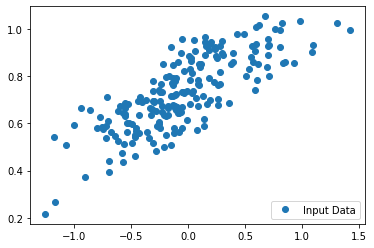

In [65]:
plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend(loc=4)
plt.show()

In [70]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = W * x_point + B

# Computes the mean of elements across dimensions of a tensor
cost_function = tf.reduce_mean(tf.square(y - y_point))

# Optimizer that implements the gradient descent algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

# Add operations to minimize cost_function
train = optimizer.minimize(cost_function)

# Returns an Op that initializes global variables
# model = tf.initialize_all_variables()
model = tf.global_variables_initializer()

  0%|          | 0/2001 [00:00<?, ?it/s]


 y = [-0.5919428] x + [0.13987046] 


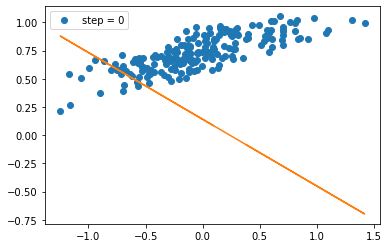


 y = [-0.5582773] x + [0.2521002] 


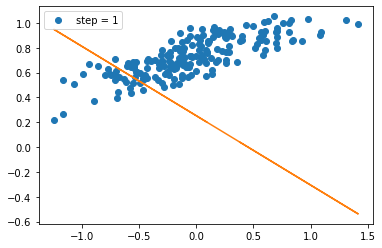


 y = [-0.52508056] x + [0.3422153] 


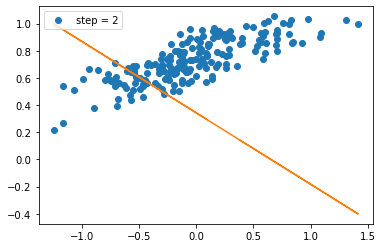


 y = [-0.49254832] x + [0.41463408] 


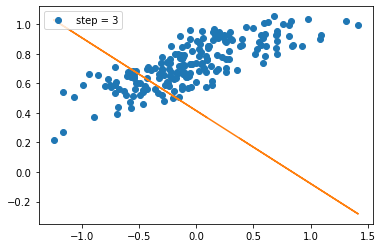


 y = [-0.46082368] x + [0.47288927] 


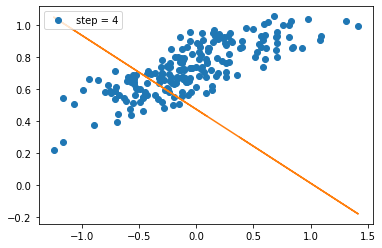


 y = [0.17209367] x + [0.73737997] 


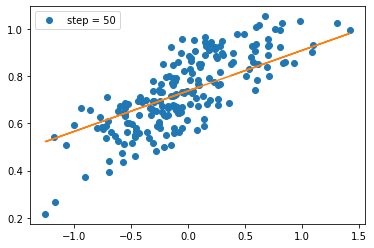


 y = [0.24753423] x + [0.7422119] 


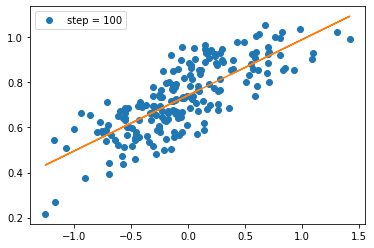


 y = [0.25465754] x + [0.7426674] 


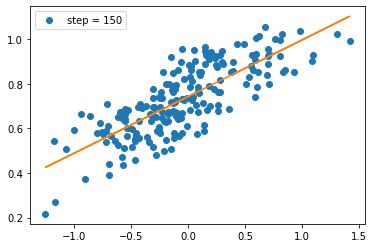


 y = [0.25533006] x + [0.7427104] 


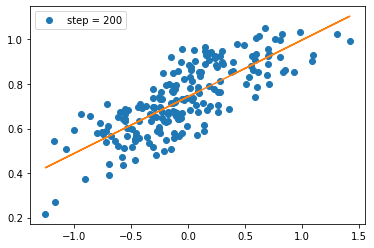


 y = [0.25539362] x + [0.7427144] 


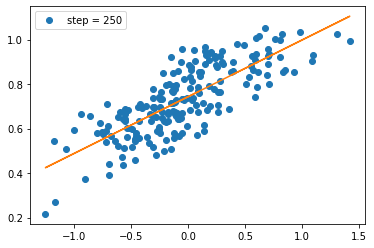


 y = [0.25539958] x + [0.7427147] 


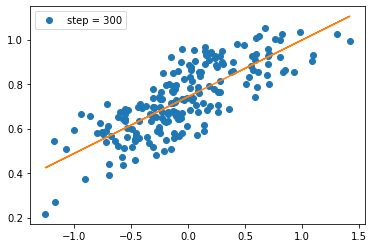


 y = [0.2553999] x + [0.7427147] 


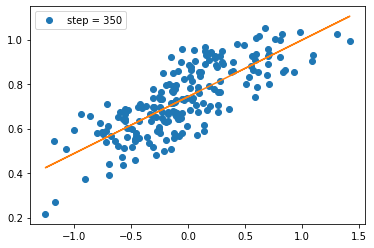


 y = [0.2553999] x + [0.7427147] 


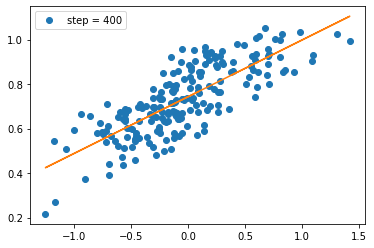


 y = [0.2553999] x + [0.7427147] 


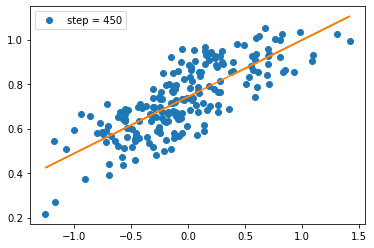


 y = [0.2553999] x + [0.7427147] 


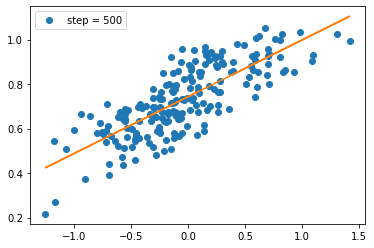


 y = [0.2553999] x + [0.7427147] 


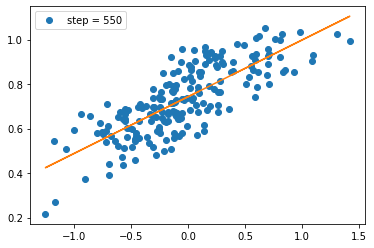


 y = [0.2553999] x + [0.7427147] 


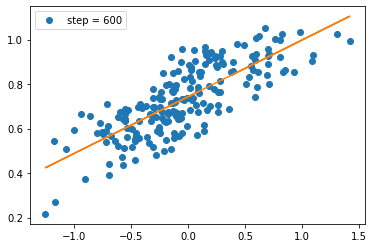


 y = [0.2553999] x + [0.7427147] 


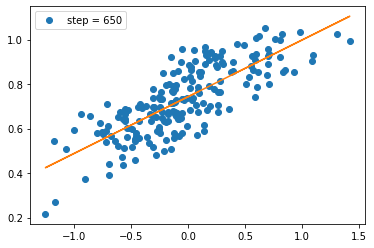


 y = [0.2553999] x + [0.7427147] 


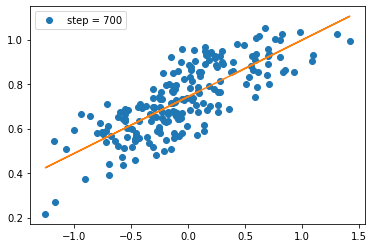


 y = [0.2553999] x + [0.7427147] 


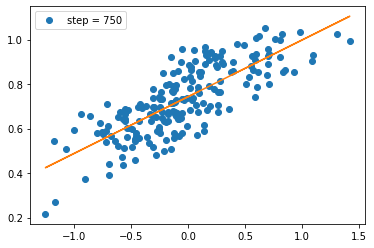


 y = [0.2553999] x + [0.7427147] 


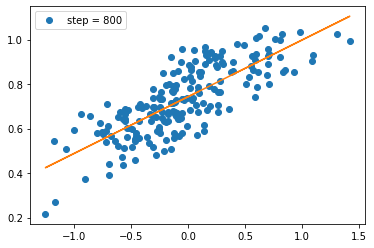


 y = [0.2553999] x + [0.7427147] 


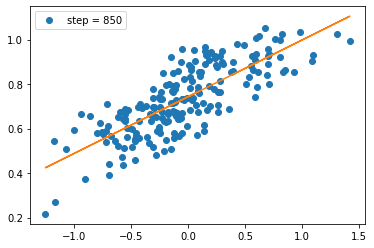


 y = [0.2553999] x + [0.7427147] 


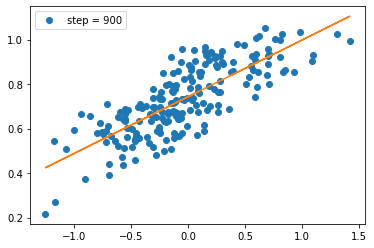


 y = [0.2553999] x + [0.7427147] 


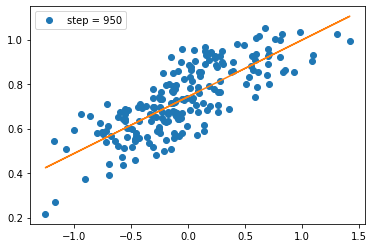


 y = [0.2553999] x + [0.7427147] 


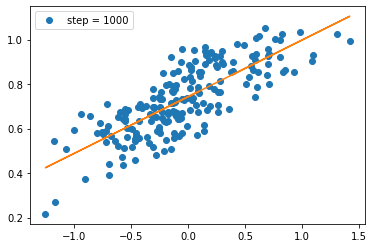


 y = [0.2553999] x + [0.7427147] 


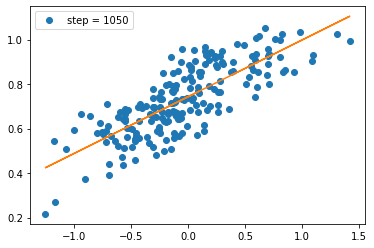


 y = [0.2553999] x + [0.7427147] 


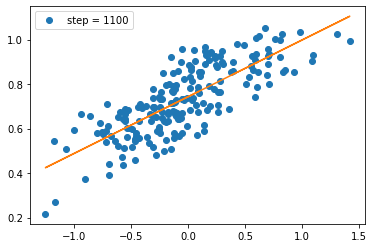


 y = [0.2553999] x + [0.7427147] 


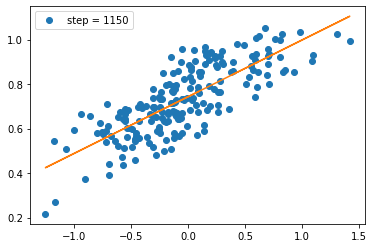


 y = [0.2553999] x + [0.7427147] 


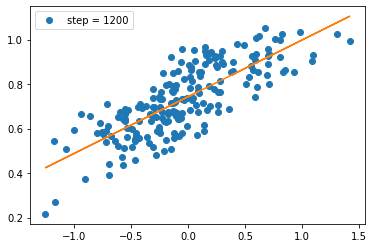


 y = [0.2553999] x + [0.7427147] 


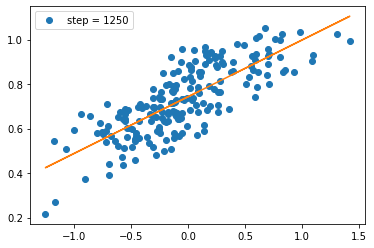


 y = [0.2553999] x + [0.7427147] 


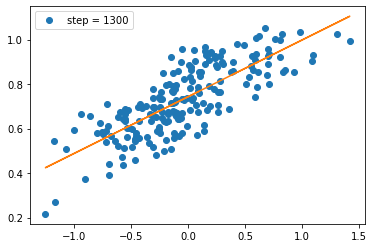


 y = [0.2553999] x + [0.7427147] 


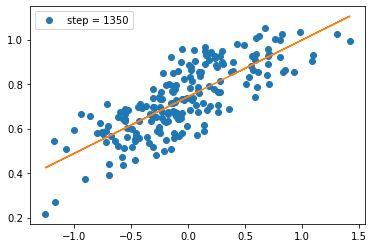


 y = [0.2553999] x + [0.7427147] 


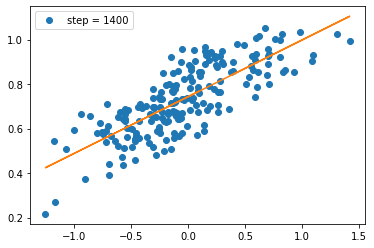


 y = [0.2553999] x + [0.7427147] 


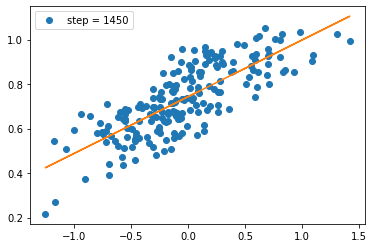


 y = [0.2553999] x + [0.7427147] 


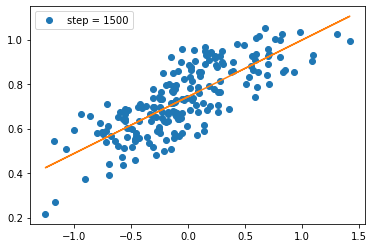


 y = [0.2553999] x + [0.7427147] 


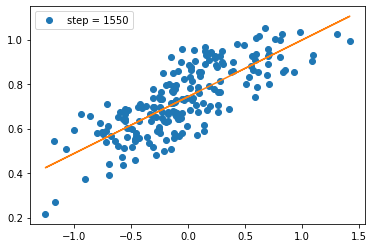


 y = [0.2553999] x + [0.7427147] 


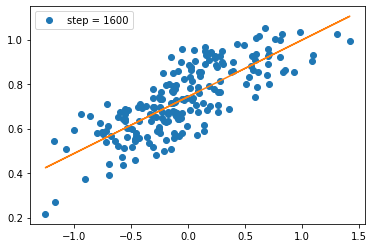


 y = [0.2553999] x + [0.7427147] 


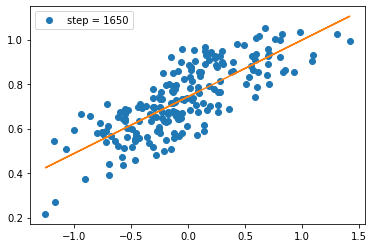


 y = [0.2553999] x + [0.7427147] 


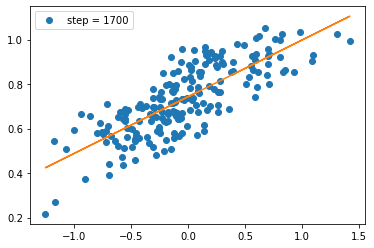


 y = [0.2553999] x + [0.7427147] 


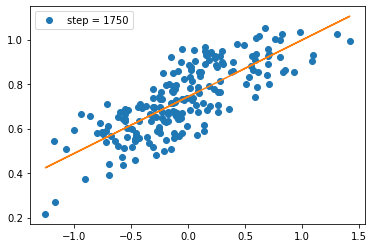


 y = [0.2553999] x + [0.7427147] 


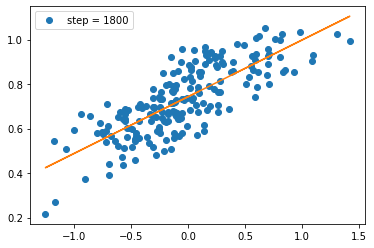


 y = [0.2553999] x + [0.7427147] 


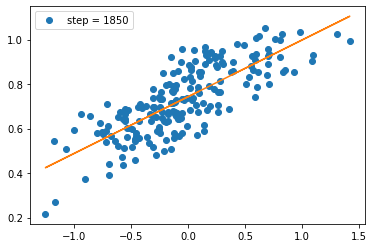


 y = [0.2553999] x + [0.7427147] 


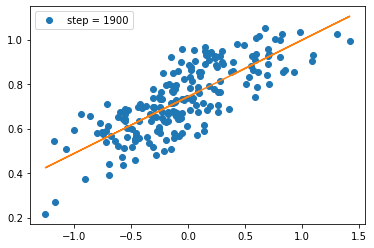


 y = [0.2553999] x + [0.7427147] 


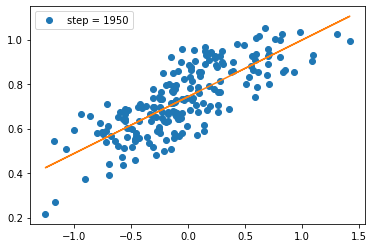


 y = [0.2553999] x + [0.7427147] 


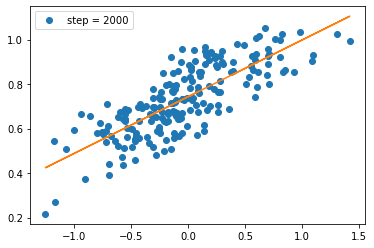

In [71]:
with tf.Session() as sess:
    sess.run(model)
    for step in tqdm(range(0,2001)):
        sess.run(train)
        if (step % 50) == 0 or step<5:
            print("\n y = {w} x + {b} ".format(w=sess.run(W), b=sess.run(B)))
            plt.plot(x_point,y_point,'o',label='step = {}'.format(step))
            plt.plot(x_point,sess.run(W)*x_point+sess.run(B))
            plt.legend(loc=2)
            plt.show()